### Load the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

### Load the Data

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/Shop sales/sales_train.csv")
item_cat = pd.read_csv("/content/gdrive/MyDrive/Shop sales/item_categories.csv")
items = pd.read_csv('/content/gdrive/MyDrive/Shop sales/items.csv')
shops = pd.read_csv("/content/gdrive/MyDrive/Shop sales/shops.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Shop sales/test.csv")
sample_sub = pd.read_csv("/content/gdrive/MyDrive/Shop sales/sample_submission.csv")

## EDA

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
print(train.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [ ]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [ ]:
#telss the unique values in each of the columns
# some items have the same price., there are 34 months, 60 different shops, about 21,000 different items
train.nunique()

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64

In [ ]:
item_cat.head(10)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [ ]:
item_cat.nunique()

item_category_name    84
item_category_id      84
dtype: int64

so the different category of items have thier unique names, but looking at rows 1 - 7 it looks like they have the same initials
but its in russia, this can be helpful in feature engineering, maybe we can have a new category with the items having a particular initials

In [ ]:
items.head(10)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40
8,***ЧАЙ С МУССОЛИНИ D,8,40
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40


In [ ]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [ ]:
shops.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [ ]:
shops.nunique()

shop_name    60
shop_id      60
dtype: int64

from looking at some rows they have similar initials this may be due to the shops located in the same location or it might be a single shop divided into sub-shops, probably check the interpretation of the names in english

Looks like there is no missing values in any of the dataset

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


we can generate columns like the year, weekends and weekdays, maybe sth like festive periods,

## Checking Outliers

In [ ]:
train.item_price.sort_values(ascending=False)

1163158    307980.0000
885138      59200.0000
1488135     50999.0000
2327159     49782.0000
2910156     42990.0000
              ...     
673155          0.0900
611400          0.0875
579766          0.0700
608763          0.0700
484683         -1.0000
Name: item_price, Length: 2935849, dtype: float64

we can see the price of a data being -1 and also the highest price is 307980, this might be an outlier
Checking!!

In [ ]:
# starting with -1.
train[train['item_price'] == -1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [ ]:
# checking similar item_ids
# putting the modal value for the month and particalr item where the value was -1

train[(train['item_id'] == 2973) & (train['date_block_num'] == 4)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
442065,04.05.2013,4,28,2973,2499.0,1.0
442083,24.05.2013,4,28,2973,1249.5,1.0
442084,16.05.2013,4,28,2973,1249.0,1.0
445020,05.05.2013,4,27,2973,2499.0,1.0
445021,20.05.2013,4,27,2973,1249.0,1.0
...,...,...,...,...,...,...
528018,19.05.2013,4,7,2973,1249.0,1.0
528897,18.05.2013,4,5,2973,1249.5,1.0
529456,23.05.2013,4,50,2973,1249.0,1.0
531332,08.05.2013,4,6,2973,2499.0,1.0


In [ ]:
# putting the modal value for the month and particalr item where the value was -1
modal_value = train[(train['item_id'] == 2973) & (train['date_block_num'] == 4)]['item_price'].mode()[0]

In [ ]:
#####
train.loc[484683,'item_price'] = modal_value

In [ ]:
train[train['item_price'] == 307980]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [ ]:
train[train['item_id'] == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


this item is found in only 1 shop and only one was sold that day, it looks surprising
checking the name and if it is in the test data

In [ ]:
test[test['item_id'] == 6066]
#so it is not found in the test dataset, so maybbe it is not useful, we can drop it

,ID,shop_id,item_id


In [ ]:
#######
train.drop(1163158,axis=0, inplace=True)

In [ ]:
train['item_cnt_day'].sort_values(ascending=False)

2909818    2169.0
2326930    1000.0
2864235     669.0
2851091     637.0
2608040     624.0
            ...  
940092       -6.0
59156        -6.0
2048519      -9.0
1835454     -16.0
1057907     -22.0
Name: item_cnt_day, Length: 2935848, dtype: float64

In [ ]:
#there are negative values,whcich looks somehow, lets c heck the largest values also
train[train['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


about 7000 columns have negative values, this can be a mistake and we can put the absolute values

In [ ]:
# also checking the highest count day if it is an anomaly
train[train['item_cnt_day'] == 2169]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [ ]:
#checking for other shops this item was sold
train[train['item_id'] == 11373].head()
#found out that this item was sold in only one shop and also other item_cnt_day were normal , so it looks like an anomaly

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.0,1.0
58324,31.01.2013,0,12,11373,97.8,5.0
176790,01.02.2013,1,12,11373,229.0,1.0
176791,04.02.2013,1,12,11373,130.0,1.0
302468,29.03.2013,2,12,11373,139.5,2.0


In [ ]:
######Dropping it 
train = train[train['item_cnt_day'] < 2000]

In [ ]:
train['item_id'].value_counts(ascending=False)[:5]

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
Name: item_id, dtype: int64

In [ ]:
items.loc[items['item_id']==20949]
# ONLY ONE ITEM IS THE TRAIN DATA SET, 

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [ ]:
test.loc[test['item_id']==20949].head()
# and it is found in the test dataset a lot

,ID,shop_id,item_id
460,460,5,20949
5560,5560,4,20949
10660,10660,6,20949
15760,15760,3,20949
20860,20860,2,20949


# checking the test distribution

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


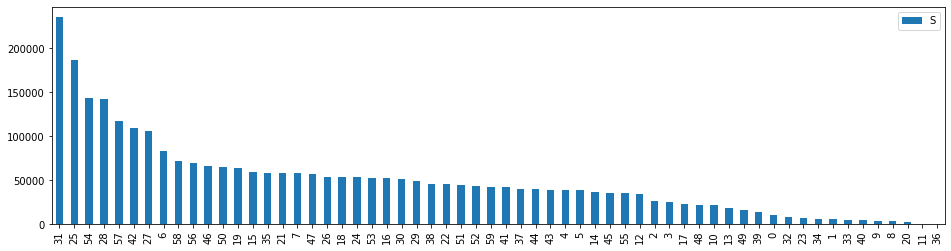

In [ ]:
plt.figure(figsize=(16,4))
train.shop_id.value_counts().plot.bar()
plt.legend("Shop_id Train Distribution")

Text(0.5, 1.0, 'Shop_id Test Distribution')

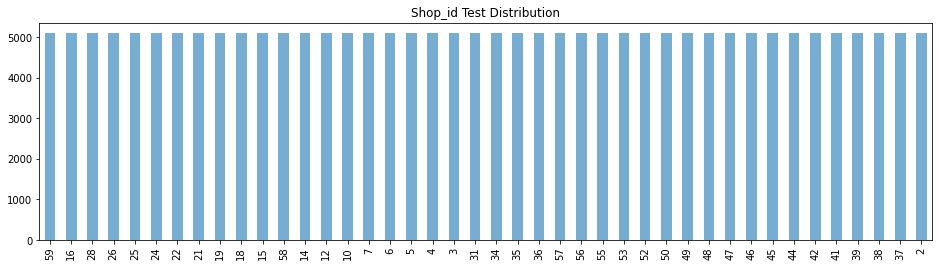

In [ ]:
plt.figure(figsize=(16,4))
test.shop_id.value_counts().plot.bar(alpha=0.6)
plt.title("Shop_id Test Distribution")

from this plot we can see that not all the shops in the train are present in the test. Lets check it!
Also the shops in the test looks evenly distributed, unlike the train data

In [ ]:
print("Unique shop id in train",train.shop_id.nunique())
print("Unique shop id in test", test.shop_id.nunique())

Unique shop id in train 60
Unique shop id in test 42


In [ ]:
print("List of shop_ids not in test",set(train.shop_id.unique()) - set(test.shop_id.unique()))

List of shop_ids not in test {0, 1, 32, 33, 8, 9, 40, 11, 43, 13, 17, 51, 20, 54, 23, 27, 29, 30}


Most of the shops that are not in the test have occured less

In [ ]:
print("Unique shop id in train",train.item_id.nunique())
print("Unique shop id in test", test.item_id.nunique())

Unique shop id in train 21806
Unique shop id in test 5100


In [ ]:

(set(test['item_id'].unique()).issubset(set(train['item_id'].unique())))

False

Only about 25% of the items in train are found in the test for prediction.
Also Some items in the test are not found in the train, this can be disturbing

In [ ]:
len(set(test['item_id'].unique()).difference(set(train['item_id'].unique())))

363

About 363 of them

In [ ]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


Shops seems to have similar initials, from tthe google translate, they represent their cities, so this can be 
used in feature generation
shops 10 abd 11 are the same
shops 0 and 57 looks the same
shops 1 and 58 also looks the same

In [ ]:
#########
train.loc[train['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 0, 'shop_id'] = 57

train.loc[train['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 1, 'shop_id'] = 58

train.loc[train['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 10, 'shop_id'] = 11

In [ ]:
cities = shops['shop_name'].str.split(' ').map(lambda row: row[0])
cities.unique()

array(['!Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Якутск', 'Ярославль'], dtype=object)

'!Якутск' and 'Якутск' are the same

In [ ]:
#creating a columnn called city for the shops
shops['city'] = shops['shop_name'].str.split(' ').map(lambda row: row[0])
#'!Якутск' and 'Якутск' are the same
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [ ]:
# so label encoding them
from sklearn.preprocessing import LabelEncoder
lbr = LabelEncoder()
shops['city_label'] = lbr.fit_transform(shops['city'])
shops.drop(['shop_name', 'city'], axis = 1, inplace = True)
shops.head()

,shop_id,city_label
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [ ]:
#items categories in the test data that are in the train data
cat_test = items.loc[items['item_id'].isin(sorted(test['item_id'].unique()))].item_category_id.unique()

In [ ]:
item_cat.loc[item_cat['item_category_id'].isin(cat_test)].T

,0,2,3,5,6,7,9,11,12,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,40,41,42,43,44,45,47,49,54,55,56,57,58,60,61,62,63,64,65,67,69,70,71,72,73,74,75,76,77,78,79,83
item_category_name,PC - Гарнитуры/Наушники,Аксессуары - PS3,Аксессуары - PS4,Аксессуары - PSVita,Аксессуары - XBOX 360,Аксессуары - XBOX ONE,Доставка товара,Игровые консоли - PS3,Игровые консоли - PS4,Игровые консоли - XBOX 360,Игровые консоли - XBOX ONE,Игры - PS3,Игры - PS4,Игры - PSP,Игры - PSVita,Игры - XBOX 360,Игры - XBOX ONE,Игры - Аксессуары для игр,Игры Android - Цифра,Игры MAC - Цифра,Игры PC - Дополнительные издания,Игры PC - Коллекционные издания,Игры PC - Стандартные издания,Игры PC - Цифра,Карты оплаты - Live!,Карты оплаты - Live! (Цифра),Карты оплаты - PSN,Карты оплаты - Windows (Цифра),Кино - Blu-Ray,Кино - Blu-Ray 3D,Кино - DVD,Кино - Коллекционное,"Книги - Артбуки, энциклопедии",Книги - Аудиокниги,Книги - Аудиокниги (Цифра),Книги - Аудиокниги 1С,"Книги - Комиксы, манга",Книги - Методические материалы 1С,Книги - Цифра,Музыка - CD локального производства,Музыка - CD фирменного производства,Музыка - MP3,Музыка - Винил,Музыка - Подарочные издания,Подарки - Атрибутика,"Подарки - Гаджеты, роботы, спорт",Подарки - Мягкие игрушки,Подарки - Настольные игры,Подарки - Настольные игры (компактные),Подарки - Развитие,Подарки - Сувениры,Подарки - Сувениры (в навеску),"Подарки - Сумки, Альбомы, Коврики д/мыши",Подарки - Фигурки,Программы - 1С:Предприятие 8,Программы - MAC (Цифра),Программы - Для дома и офиса,Программы - Для дома и офиса (Цифра),Программы - Обучающие,Программы - Обучающие (Цифра),Служебные,Элементы питания
item_category_id,0,2,3,5,6,7,9,11,12,15,16,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,40,41,42,43,44,45,47,49,54,55,56,57,58,60,61,62,63,64,65,67,69,70,71,72,73,74,75,76,77,78,79,83


Getting item categories name for feature generation

In [ ]:

main_categories = item_cat['item_category_name'].str.split('-')
item_cat['main_category_id'] = main_categories.map(lambda row: row[0].strip())
item_cat['main_category_id'] = lbr.fit_transform(item_cat['main_category_id'])

# Some items don't have sub-categories. For those, we will use the main category as a sub-category
item_cat['sub_category_id'] = main_categories.map(lambda row: row[1].strip() if len(row) > 1 else row[0].strip())
item_cat['sub_category_id'] = lbr.fit_transform(item_cat['sub_category_id'])

In [ ]:
item_cat.head()

,item_category_name,item_category_id,main_category_id,sub_category_id
0,PC - Гарнитуры/Наушники,0,0,29
1,Аксессуары - PS2,1,1,9
2,Аксессуары - PS3,2,1,10
3,Аксессуары - PS4,3,1,11
4,Аксессуары - PSP,4,1,13


# Now on to the main problem, finding the item count month for each shop item pair

In [ ]:
train['date'] =  pd.to_datetime(train['date'], format='%d.%m.%Y')

We will need to generate for each month, a shop having each item, thiis is going to form a very long dataframe

In [ ]:
from tqdm import tqdm_notebook

def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float16`
                `int64`   type to `int16`
    '''
    
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float16)
    df[int_cols]   = df[int_cols].astype(np.int16)
    
    return df

In [ ]:
from itertools import product
months = train['date_block_num'].unique()
cartesian = []
for month in months:
    shops_in_month = train.loc[train['date_block_num']==month, 'shop_id'].unique()
    items_in_month = train.loc[train['date_block_num']==month, 'item_id'].unique()
    cartesian.append(np.array(list(product(*[shops_in_month, items_in_month, [month]])), dtype='int32'))

In [ ]:
cartesian_df = pd.DataFrame(np.vstack(cartesian), columns = ['shop_id', 'item_id', 'date_block_num'], dtype=np.int32)

In [ ]:
cartesian_df.shape

(10913804, 3)

## Aggregating sales to a monthly level and clipping target variable

In [ ]:
# getting the item_cnt_month as sum for each shops for a particular item for eachc particular month
x = train.groupby(['shop_id', 'item_id', 'date_block_num'])['item_cnt_day'].sum().rename('item_cnt_month').reset_index()
x.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,2,27,0,1.0
1,2,27,17,1.0
2,2,30,2,1.0
3,2,30,5,1.0
4,2,30,15,1.0


Now we can join the two dataframes created and making them intersect on the shop_id, item_id and the month, 
we will put the values for the item count month for the ones in the cartesian_df and put the value 0 for the ones we dont have

In [ ]:
new_train = pd.merge(cartesian_df, x, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)

In [ ]:
new_train.head(10)

,shop_id,item_id,date_block_num,item_cnt_month
0,59,22154,0,1.0
1,59,2552,0,0.0
2,59,2554,0,0.0
3,59,2555,0,0.0
4,59,2564,0,0.0
5,59,2565,0,0.0
6,59,2572,0,0.0
7,59,2573,0,0.0
8,59,2574,0,2.0
9,59,2593,0,0.0


In [ ]:
new_train['item_cnt_month'] = np.clip(new_train['item_cnt_month'], 0, 20)

In [ ]:
new_train['item_cnt_month'].max()

20.0

In [ ]:
del train
del x
del cartesian_df
del cartesian
del cat_test


In [ ]:
#Now sorting them with the months, then shop_id then items respectively
new_train.sort_values(['date_block_num','shop_id','item_id'], inplace = True)
new_train.head()

,shop_id,item_id,date_block_num,item_cnt_month
114910,2,19,0,0.0
117150,2,27,0,1.0
120623,2,28,0,0.0
118316,2,29,0,0.0
114602,2,32,0,0.0


## Addinng the test data so as to do feature engineeing for both datasets

In [ ]:
#putting 34 month and 0 for item_cnt_month for now
test['date_block_num'] = 34
test['item_cnt_month'] = 0

In [ ]:
test.head()

,ID,shop_id,item_id,date_block_num,item_cnt_month
0,0,5,5037,34,0
1,1,5,5320,34,0
2,2,5,5233,34,0
3,3,5,5232,34,0
4,4,5,5268,34,0


In [ ]:
total_data = new_train.append(test.drop("ID",axis=1))

In [ ]:
len(total_data[total_data.date_block_num > 33])

214200

lets now add the features we had generated which include: city_label, main_cat_id and subcategory_id

In [ ]:
total_data = pd.merge(total_data, shops,how='left',on=['shop_id'])
total_data.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label
0,2,19,0,0.0,0
1,2,27,0,1.0,0
2,2,28,0,0.0,0
3,2,29,0,0.0,0
4,2,32,0,0.0,0


In [ ]:
#item_category_id
total_data = pd.merge(total_data,items.drop('item_name',axis=1), how='left', on=['item_id'])
total_data.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id
0,2,19,0,0.0,0,40
1,2,27,0,1.0,0,19
2,2,28,0,0.0,0,30
3,2,29,0,0.0,0,23
4,2,32,0,0.0,0,40


In [ ]:
# adding main_cat_id and subcategory_id
total_data = pd.merge(total_data,item_cat.drop('item_category_name',axis=1), how='left',on=['item_category_id'])
total_data.head()

,shop_id,item_id,date_block_num,item_cnt_month,city_label,item_category_id,main_category_id,sub_category_id
0,2,19,0,0.0,0,40,11,4
1,2,27,0,1.0,0,19,5,10
2,2,28,0,0.0,0,30,8,55
3,2,29,0,0.0,0,23,5,16
4,2,32,0,0.0,0,40,11,4


In [ ]:
#Generating date time features, lag features and window features
#Date time features: day, Weekend or not, season of the year, public holiday or not, leap year or not


In [ ]:
del items
del item_cat
del shops
del test

In [ ]:
total_data = downcast_dtypes(total_data)

### Date Time Features

In [ ]:
total_data['month'] = total_data['date_block_num'] % 12

In [ ]:
#holidays feature
holiday_dict = {
    0: 6,
    1: 3,
    2: 2,
    3: 8,
    4: 3,
    5: 3,
    6: 2,
    7: 8,
    8: 4,
    9: 8,
    10: 5,
    11: 4,
}


total_data['monthly_holidays'] = total_data['month'].map(holiday_dict)

In [ ]:
def generate_lag(train, months, lag_column):
    for month in months:
        # Speed up by grabbing only the useful bits
        train_shift = train[['date_block_num', 'shop_id', 'item_id', lag_column]].copy()
        train_shift.columns = ['date_block_num', 'shop_id', 'item_id', lag_column+'_lag_'+ str(month)]
        train_shift['date_block_num'] += month
        train = pd.merge(train, train_shift, on=['date_block_num', 'shop_id', 'item_id'], how='left')
    return train

In [ ]:
import gc
gc.collect()

279

### Lag for the target value

In [ ]:
%%time
total_data = generate_lag(total_data, [1,2,3,6,12], 'item_cnt_month')

CPU times: user 30.1 s, sys: 1.06 s, total: 31.2 s
Wall time: 31.2 s


### Lag for the item-mean value

In [ ]:
%%time
item_mean = total_data.groupby(['date_block_num', 'item_id'])['item_cnt_month'].mean().rename('item_month_mean').reset_index()
total_data = pd.merge(total_data, item_mean, on=['date_block_num', 'item_id'], how='left')
total_data = generate_lag(total_data, [1,2,3,4,6], 'item_month_mean')
total_data.drop(['item_month_mean'], axis=1, inplace=True)

CPU times: user 34 s, sys: 564 ms, total: 34.6 s
Wall time: 34.6 s


### Lag for shop-mean value

In [ ]:
%%time
shop_mean = total_data.groupby(['date_block_num', 'shop_id'])['item_cnt_month'].mean().rename('shop_month_mean').reset_index()
total_data = pd.merge(total_data,shop_mean, on=['date_block_num', 'shop_id'], how='left')
total_data = generate_lag(total_data, [1,2,3,6], 'shop_month_mean')
total_data.drop(['shop_month_mean'], axis=1, inplace=True)

CPU times: user 31.6 s, sys: 755 ms, total: 32.4 s
Wall time: 32.4 s


### Lag for shop category target mean

In [ ]:
%%time
group =total_data.groupby(['date_block_num', 'shop_id', 'item_category_id'])['item_cnt_month'].mean().rename('shop_category_month_mean').reset_index()
total_data = pd.merge(total_data, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
total_data = generate_lag(total_data, [1, 2], 'shop_category_month_mean')
total_data.drop(['shop_category_month_mean'], axis=1, inplace=True)

CPU times: user 18.4 s, sys: 379 ms, total: 18.7 s
Wall time: 18.8 s


### Lag for month main category mean

In [ ]:
%%time
group = total_data.groupby(['date_block_num', 'main_category_id'])['item_cnt_month'].mean().rename('main_category_month_mean').reset_index()
total_data = pd.merge(total_data, group, on=['date_block_num', 'main_category_id'], how='left')

total_data = generate_lag(total_data, [1], 'main_category_month_mean')
total_data.drop(['main_category_month_mean'], axis=1, inplace=True)

CPU times: user 11.1 s, sys: 238 ms, total: 11.4 s
Wall time: 11.4 s


### Lag for monthly sub-category mean

In [ ]:
%%time
group = total_data.groupby(['date_block_num', 'sub_category_id'])['item_cnt_month'].mean().rename('sub_category_month_mean').reset_index()
total_data = pd.merge(total_data, group, on=['date_block_num', 'sub_category_id'], how='left')

total_data = generate_lag(total_data, [1], 'sub_category_month_mean')
total_data.drop(['sub_category_month_mean'], axis=1, inplace=True)

CPU times: user 11.7 s, sys: 343 ms, total: 12.1 s
Wall time: 12.1 s


In [ ]:
total_data = downcast_dtypes(total_data)

Training and Valiidation

In [ ]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            df[col].fillna(0, inplace=True)         
    return df

totall_data = fill_na(total_data)

In [ ]:
total_data.shape

(11128004, 28)

In [ ]:
del sample_sub,main_categories,new_train, shops_in_month,items_in_month,item_mean,sns

In [ ]:
#using Xgboost
import xgboost as xgb

    
regressor = xgb.XGBRegressor(n_estimators = 800,
                             learning_rate=0.01,
                              max_depth = 6,
                              subsample=0.8,
                              colsample_bytree = 0.5,tree_method='gpu_hist')
    
    

In [ ]:
regressor_ = regressor.fit(total_data[total_data.date_block_num < 33].drop(['item_cnt_month'], axis=1).values, 
                           total_data[total_data.date_block_num < 33]['item_cnt_month'].values, 
                           eval_metric = 'rmse', 
                           eval_set = [(total_data[total_data.date_block_num == 33].drop(['item_cnt_month'], axis=1).values, 
                                        total_data[total_data.date_block_num == 33]['item_cnt_month'].values)], 
                           verbose=False,
                            early_stopping_rounds = 50)
                           

[23:20:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
predictions = regressor_.predict(total_data[total_data.date_block_num == 34].drop(['item_cnt_month'], axis = 1).values)

In [ ]:
test = pd.read_csv("/content/gdrive/MyDrive/Shop sales/test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
dic = {'ID':test['ID'],'item_cnt_month':predictions}

In [ ]:
sub = pd.DataFrame(dic)
sub.head()

,ID,item_cnt_month
0,0,0.607829
1,1,0.279712
2,2,1.172206
3,3,0.431427
4,4,3.075114


In [ ]:
sub = sub.set_index("ID")
sub.head()

,item_cnt_month
ID,
0,0.607829
1,0.279712
2,1.172206
3,0.431427
4,3.075114


In [ ]:
sub.to_csv("sales_prediction10.csv")

# New Section